**Lab2-DL: A2-PyTorch-Lightning.ipynb** (ELMED219) | Prioritet: 3 (valgfri)

_En kort introduksjon til **PyTorch** og **Lightning** for medisinstudenter – AI-assistert notebook_

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab2-DL/notebooks/A2-PyTorch-Lightning.ipynb)

Sist oppdatert: 2025-01-18, A. Lundervold

Bruk `elmed219` conda-miljøet eller Google Colab

# Introduksjon til PyTorch og Lightning for medisinsk AI

PyTorch og Lightning er kraftige verktøy for å utvikle AI-modeller i helsevesenet. La oss utforske dem gjennom en medisinsk linse!

## What is PyTorch?
Think of PyTorch as your digital microscope for deep learning. Just like a microscope helps you examine cellular structures, PyTorch helps you build and analyze neural networks. It's particularly popular in medical imaging and biosignal analysis - and recently also in the prediction and characterization of (clinical) outcomes from tabular data (cfr. TabPFN).

Here's a simple example of loading a medical image dataset in PyTorch:

```python
import torch
from torchvision import transforms

# Define how we want to process our medical images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to standard size, 224x224 
    transforms.ToTensor(),          # Convert to PyTorch tensor
    transforms.Normalize([0.5], [0.5])  # Pixel_normalized = (pixel - mean) / std i.e. N(0.5,0.5)
])

# Example of creating a simple dataset for chest X-rays
class ChestXrayDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, labels):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = load_medical_image(self.image_paths[idx])  # Your image loading function
        label = self.labels[idx]  # e.g., 0 for normal, 1 for pneumonia
        return self.transform(image), label
```

## What is Lightning?
Lightning is like having a highly organized lab protocol for your deep learning experiments. It helps structure your code and automates many repetitive tasks. Here's how you might structure a basic medical image classifier:

```python
import pytorch_lightning as pl

class MedicalImageClassifier(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = create_model()  # Your model architecture
        
    def training_step(self, batch, batch_idx):
        images, labels = batch
        predictions = self.model(images)
        loss = self.loss_function(predictions, labels)
        self.log('train_loss', loss)
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)
```

## Real-world Medical Example
Let's say you're developing a model to detect diabetic retinopathy in eye fundus images:

```python
# Define model architecture for retinal image analysis
class RetinalAnalysis(pl.LightningModule):
    def __init__(self):
        super().__init__()
        # Convolutional layers for image processing
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3),  # Input: RGB fundus image
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Linear(64 * 54 * 54, 5)  # 5 severity grades
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)
```

## Key Benefits for Medical Applications
1. PyTorch provides intuitive ways to handle medical data formats (DICOM, NIfTI, etc.)
2. Lightning's structured approach ensures reproducibility - crucial for clinical research
3. Both tools support GPU acceleration, essential for processing large medical datasets

This introduction focuses on the basics - you can build upon these concepts as you explore more advanced applications in medical AI!

Would you like me to elaborate on any particular aspect or provide more specific examples?

## More Detailed PyTorch & Lightning Explanation for Medical AI

Let's break this down into three main sections:

### 1. Medical Image Dataset Creation
````python
# Define image preprocessing steps (like specimen preparation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),     # Like standardizing slide dimensions
    transforms.ToTensor(),             # Like digitizing the image
    transforms.Normalize([0.5], [0.5])  # Like adjusting microscope contrast
])

class ChestXrayDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, labels):
        # Initialize dataset (like setting up a specimen database)
        self.image_paths = image_paths  # List of image file locations
        self.labels = labels           # Diagnosis for each image
        self.transform = transform     # Image preprocessing steps
    
    def __len__(self):
        # Return dataset size (like counting specimens)
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        # Get single sample (like retrieving one specimen)
        image = load_medical_image(self.image_paths[idx])
        label = self.labels[idx]  # e.g., normal=0, pneumonia=1
        return self.transform(image), label
````

### 2. Basic Medical Image Classifier
````python
class MedicalImageClassifier(pl.LightningModule):
    def __init__(self):
        super().__init__()
        # Initialize model (like setting up diagnostic protocol)
        self.model = create_model()
    
    def training_step(self, batch, batch_idx):
        # Single training step (like learning from one set of cases)
        images, labels = batch        # Get batch of images and diagnoses
        predictions = self.model(images)  # Make predictions
        loss = self.loss_function(predictions, labels)  # Calculate error
        self.log('train_loss', loss)     # Record performance
        return loss
    
    def configure_optimizers(self):
        # Set up optimization method (like training strategy)
        return torch.optim.Adam(self.parameters(), lr=0.001)
````

### 3. Retinal Analysis Model
````python
class RetinalAnalysis(pl.LightningModule):
    def __init__(self):
        super().__init__()
        # Define network architecture (like diagnostic workflow)
        self.features = nn.Sequential(
            # First layer: Initial feature detection
            nn.Conv2d(3, 32, 3),      # Input: RGB fundus image
            nn.ReLU(),                # Activation function
            nn.MaxPool2d(2),          # Reduce image size
            
            # Second layer: More complex features
            nn.Conv2d(32, 64, 3),     # More feature detectors
            nn.ReLU(),                # Another activation
            nn.MaxPool2d(2)           # Further size reduction
        )
        # Classification layer
        self.classifier = nn.Linear(64 * 54 * 54, 5)  # 5 severity grades
    
    def forward(self, x):
        # Forward pass (like diagnostic process)
        x = self.features(x)          # Extract image features
        x = x.view(x.size(0), -1)     # Flatten features
        return self.classifier(x)      # Make final diagnosis
````

### Key Components Explained:

1. **Data Handling**:
   - Like organizing medical records
   - Standardizes image sizes
   - Normalizes image values
   - Pairs images with diagnoses

2. **Model Structure**:
   - Like a diagnostic protocol
   - Processes images systematically
   - Extracts relevant features
   - Makes diagnostic predictions

3. **Training Process**:
   - Like medical training
   - Learns from examples
   - Improves with experience
   - Tracks performance

4. **Benefits for Medical Use**:
   - Handles medical image formats
   - Ensures reproducible results
   - Processes large datasets efficiently
   - Structured like clinical workflows

This framework provides a systematic way to develop AI models for medical applications, similar to how clinical protocols are structured in medicine.


I'll create a complete, executable example focusing on a medical image binary classification task. We'll use a small synthetic dataset for demonstration purposes.



Let me walk you through this educational example:

1. **Synthetic Medical Data Generation**:
   - We create a synthetic dataset that mimics medical signals (like EEG patterns)
   - Normal signals are smooth sine waves with little noise
   - Abnormal signals have additional frequency components and more noise
   - This simulates real medical signal classification tasks

2. **Model Architecture**:
   - We use a 1D Convolutional Neural Network (CNN) since we're dealing with signal data
   - The architecture is simple but effective:
     - Two convolutional layers for feature extraction
     - Max pooling layers to reduce dimensionality
     - Fully connected layers for classification

3. **PyTorch Lightning Structure**:
   - The `MedicalSignalClassifier` class inherits from `LightningModule`
   - Training and validation steps are clearly defined
   - Metrics tracking is built-in
   - The code is organized and reproducible

4. **Visualization**:
   - The code plots example signals to understand the data
   - Training progress is visualized with accuracy plots
   - This helps in understanding model performance

When you run this code, you'll see:
1. Example signals from both classes (normal and abnormal)
2. Training progress output
3. Final accuracy plots

To modify this for your specific needs, you could:
- Replace the synthetic data with real medical signals
- Adjust the model architecture for your specific task
- Add more sophisticated data augmentation
- Implement additional metrics relevant to medical applications


In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# as that makes some difference for the code below.
# We'll do this in every notebook of the course.

try:
    import google.colab
    # If this statement executes without error, you're in a Colab environment.
    is_colab = True
    print("Running in Google Colab.")
    !pip install pytorch-lightning
except ImportError:
    # An ImportError means you're not in a Colab environment.
    is_colab = False
    print("Not running in Google Colab.")

Not running in Google Colab.


## Import libraries

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from pytorch_lightning import Trainer
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

Seed set to 42
/tmp/ipykernel_17733/1868483234.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647429097/work/torch/csrc/utils/tensor_new.cpp:278.)
  self.data = torch.FloatTensor(self.data)


Displaying example signals from the dataset:


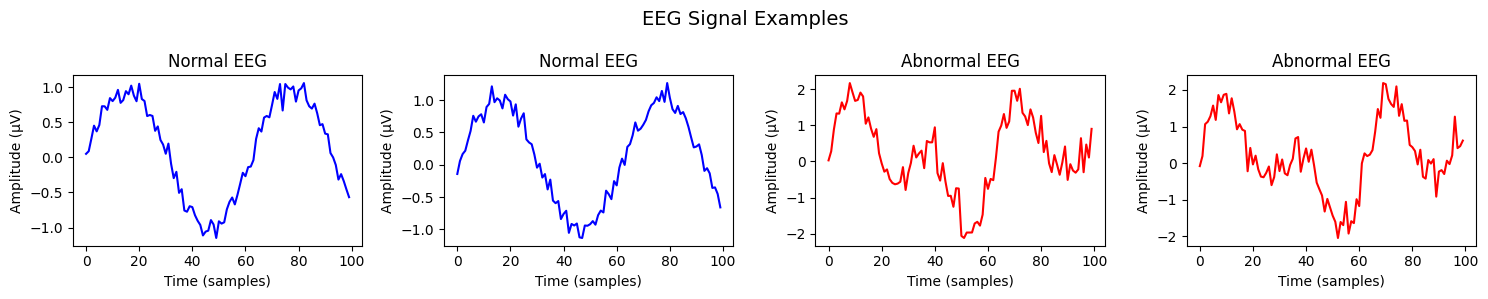

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name  | Type   | Params | Mode 
-----------------------------------------
0 | conv1 | Conv1d | 64     | train
1 | conv2 | Conv1d | 1.6


Training the model...


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (32) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


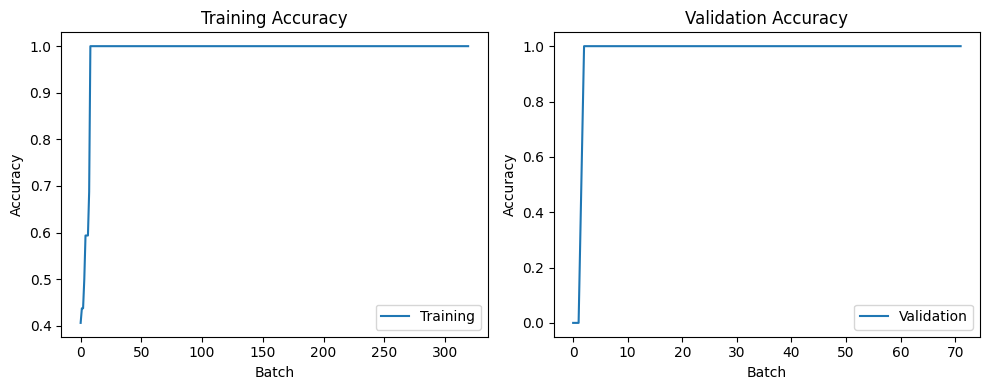

In [3]:
# Set random seed for reproducibility
pl.seed_everything(42)

# 1. Create synthetic medical data
# Simulating two types of medical signals (e.g., normal vs abnormal EEG patterns)
class SyntheticMedicalDataset(Dataset):
    def __init__(self, num_samples=1000, sequence_length=100):
        self.num_samples = num_samples
        self.sequence_length = sequence_length
        
        # Generate synthetic data
        self.data = []
        self.labels = []
        
        for i in range(num_samples):
            if i < num_samples/2:  # Normal pattern
                # Create a synthetic normal signal (smooth sine wave + noise)
                t = np.linspace(0, 10, sequence_length)
                signal = np.sin(t) + np.random.normal(0, 0.1, sequence_length)
                self.data.append(signal)
                self.labels.append(0)  # Label 0 for normal
            else:  # Abnormal pattern
                # Create a synthetic abnormal signal (irregular wave + more noise)
                t = np.linspace(0, 10, sequence_length)
                signal = np.sin(t) + np.sin(2*t) + np.random.normal(0, 0.3, sequence_length)
                self.data.append(signal)
                self.labels.append(1)  # Label 1 for abnormal
        
        self.data = torch.FloatTensor(self.data)
        self.labels = torch.LongTensor(self.labels)

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        return self.data[idx].unsqueeze(0), self.labels[idx]  # Add channel dimension

# 2. Create the Neural Network Model using Lightning
class MedicalSignalClassifier(pl.LightningModule):
    def __init__(self):
        super().__init__()
        # Calculate the output size of conv layers
        input_size = 100  # Your sequence length
        # After conv1 + pool: (100-2)/2 = 49
        # After conv2 + pool: (49-2)/2 = 23
        # Features: 32 channels * 23 features = 736
        
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3)
        self.fc1 = nn.Linear(32 * 23, 64)  # Fix: 736 input features
        self.fc2 = nn.Linear(64, 2)
        
        self.train_acc = []
        self.val_acc = []

    def forward(self, x):
        # Add shape printing for debugging
        #print(f"Input shape: {x.shape}")
        
        x = F.relu(self.conv1(x))
        x = F.max_pool1d(x, 2)
        #print(f"After conv1+pool: {x.shape}")
        
        x = F.relu(self.conv2(x))
        x = F.max_pool1d(x, 2)
        #print(f"After conv2+pool: {x.shape}")
        
        x = x.view(x.size(0), -1)
        #print(f"After flatten: {x.shape}")
        
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        
        # Calculate accuracy
        pred = torch.argmax(y_hat, dim=1)
        acc = (pred == y).float().mean()
        self.train_acc.append(acc.item())
        
        # Log metrics
        self.log('train_loss', loss)
        self.log('train_acc', acc)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        
        # Calculate accuracy
        pred = torch.argmax(y_hat, dim=1)
        acc = (pred == y).float().mean()
        self.val_acc.append(acc.item())
        
        # Log metrics
        self.log('val_loss', loss)
        self.log('val_acc', acc)

# 3. Create datasets and dataloaders
def prepare_data():
    # Create train and validation datasets
    train_dataset = SyntheticMedicalDataset(num_samples=1000)
    val_dataset = SyntheticMedicalDataset(num_samples=200)
    
    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    
    return train_loader, val_loader

# 4. Visualize some example signals
def plot_examples(dataset, num_examples=4):
    """
    Plot equal numbers of Normal and Abnormal EEG signals.
    
    Args:
        dataset: The EEG dataset
        num_examples: Total number of examples to plot (should be even)
    """
    plt.figure(figsize=(15, 3))
    
    # Find indices for normal and abnormal signals
    normal_idx = []
    abnormal_idx = []
    
    # Collect indices for each class
    for i in range(len(dataset)):
        _, label = dataset[i]
        if label == 0 and len(normal_idx) < num_examples//2:
            normal_idx.append(i)
        elif label == 1 and len(abnormal_idx) < num_examples//2:
            abnormal_idx.append(i)
            
        # Break if we have enough examples of both
        if len(normal_idx) >= num_examples//2 and len(abnormal_idx) >= num_examples//2:
            break
    
    # Plot normal examples first
    for i, idx in enumerate(normal_idx):
        signal, _ = dataset[idx]
        plt.subplot(1, num_examples, i+1)
        plt.plot(signal.squeeze().numpy(), 'b-')
        plt.title('Normal EEG')
        plt.xlabel('Time (samples)')
        plt.ylabel('Amplitude (μV)')
    
    # Plot abnormal examples second
    for i, idx in enumerate(abnormal_idx):
        signal, _ = dataset[idx]
        plt.subplot(1, num_examples, i+1+len(normal_idx))
        plt.plot(signal.squeeze().numpy(), 'r-')
        plt.title('Abnormal EEG')
        plt.xlabel('Time (samples)')
        plt.ylabel('Amplitude (μV)')
    
    plt.suptitle('EEG Signal Examples', fontsize=14)
    plt.tight_layout()
    plt.show()
    

# 5. Main training function
def main():
    # Prepare data
    train_loader, val_loader = prepare_data()
    
    # Show example signals
    print("Displaying example signals from the dataset:")
    plot_examples(train_loader.dataset)
    
    # Create and train model
    model = MedicalSignalClassifier()
    trainer = Trainer(
        max_epochs=10,
        accelerator='cpu',  # Change to 'gpu' if available
        devices=1
    )
    
    # Train the model
    print("\nTraining the model...")
    trainer.fit(model, train_loader, val_loader)
    
    # Plot training progress
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(model.train_acc, label='Training')
    plt.title('Training Accuracy')
    plt.xlabel('Batch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(model.val_acc, label='Validation')
    plt.title('Validation Accuracy')
    plt.xlabel('Batch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

**Comment:**

This appears to be a case of overfitting:

1. **Model Architecture:**
   - Small network (48.9K parameters)
   - 2 Conv1D layers + 2 Linear layers
   - Total size: 0.196 MB

2. **Training Behavior:**
   - Both training and validation accuracy quickly reach nearly 100%
   - The learning curves show very sharp improvement and then plateau
   - No signs of normal learning progression or generalization

3. **Potential Issues:**
   - Model might be memorizing the training data rather than learning meaningful patterns
   - Too high learning rate or too simple architecture
   - Lack of regularization might be allowing perfect fit to training data

**Recommendation:**
Consider adding:
- More dropout
- Data augmentation
- Reduced learning rate
- Early stopping
- Cross-validation

This would help achieve more robust and generalizable performance, even if peak accuracy is slightly lower.

In our case, we will use the **Bonn EEG dataset**, which is a more realistic dataset and will help us avoid overfitting.

-----

**[Bonn University EEG Dataset](https://www.upf.edu/web/ntsa/downloads/-/asset_publisher/xvT6E4pczrBw/content/2001-indications-of-nonlinear-deterministic-and-finite-dimensional-structures-in-time-series-of-brain-electrical-activity-dependence-on-recording-regi)**

- Paper: Andrzejak et al., Physical Review E, 2001;64:061907 [[link](https://www.upf.edu/documents/229517819/232450661/Andrzejak-PhysicalReviewE2001.pdf/0e9a54b8-8993-b400-743e-4d64fa29fb63)]
- Commonly used in epilepsy research
- Contains 5 sets (A-E) with 100 single-channel EEG segments each
- Sets A and B are from healthy subjects
- Sets C, D, and E are from patients with epilepsy
- Freely available and well-documented
- Perfect for starting out due to its manageable size

To use the code provided below:

1. Download the Bonn dataset
2. Create a directory structure as shown in the comments
3. Place the normal EEG files in 'setA' and seizure EEG files in 'setE'

Key features of this implementation:

- Uses 1D convolutions appropriate for EEG signal processing
- Implements proper train/validation split
- Includes dropout for regularization
- Uses learning rate scheduling
- Visualizes both the raw signals and training progress

The model architecture is designed specifically for EEG data:

- Multiple convolutional layers to capture temporal patterns
- Appropriate kernel sizes for EEG frequencies
- Dropout layers to prevent overfitting
- Dense layers for final classification

You could:

- Modify the code for a different EEG dataset?
- Add specific EEG preprocessing steps?
- Implement additional EEG-specific features?

### **How to Prepare the Bonn EEG Dataset and Execute a Python Code Snippet**
_Using Gemini Advanced 1.5 Pro with Deep Research ([link](https://gemini.google.com/immersive/8cb22b316265758c/9a6cfb7d-857c-400b-89cc-b54ca80da134))_

This article provides a comprehensive guide to preparing the Bonn EEG dataset and executing a Python code snippet that interacts with it. The Bonn EEG dataset is a valuable resource for epilepsy research, containing EEG recordings of various brain activities. This widely-used dataset serves as a benchmark in the field of EEG analysis, contributing significantly to the development of new algorithms and facilitating various research studies. This article will guide you through the process of obtaining the dataset, organizing it correctly, and understanding a Python code snippet designed to work with this data.

#### **Understanding the Bonn EEG Dataset**

The Bonn EEG dataset comprises five subsets (A-E) of EEG recordings, each containing 100 single-channel EEG segments. These subsets represent different states of brain activity:

* **Set A:** Normal EEG recordings from healthy volunteers with eyes open.  
* **Set B:** Normal EEG recordings from healthy volunteers with eyes closed.  
* **Set C:** EEG recordings from seizure-free intervals from the hippocampal formation of the opposite hemisphere of the brain.  
* **Set D:** EEG recordings from seizure-free intervals from within the epileptogenic zone.  
* **Set E:** EEG recordings from seizure activity.

Each EEG segment in the dataset is stored as a .txt file with 4096 samples1. The dataset includes data from five healthy volunteers and patients with medically intractable epilepsy1. It's important to note that the signals in these sets are randomized with regard to the recording contact and the patient or volunteer1. Additionally, each time series has a keyword corresponding to one of the five classes (A-E)2.

While the original research paper doesn't explicitly mention the recording equipment or sampling rate, it does state that the data was recorded using a standardized EEG recording system with 128 channels. The signals were then bandpass filtered between 0.53 Hz and 40 Hz (12 dB/oct)1.

From the [paper](https://www.upf.edu/documents/229517819/232450661/Andrzejak-PhysicalReviewE2001.pdf/0e9a54b8-8993-b400-743e-4d64fa29fb63): _Five sets (denoted A–E)  each containing 100 singlechannel EEG segments of 23.6-sec duration, were composed for the study. These segments were selected and cut out from continuous multichannel EEG recordings after visual inspection for artifacts, e.g., due to muscle activity or eye movements. In addition, the segments had to fulfill a stationarity criterion. All EEG signals were recorded with the same 128-channel amplifier system, using an average common reference [omitting electrodes containing pathological activity (C, D, and E) or strong eye movement artifacts (A and B)]. After 12 bit analog-to-digital conversion, the data were written
continuously onto the disk of a data acquisition computer system at a sampling rate of 173.61 Hz. Band-pass filter
settings were 0.53–40 Hz (12 dB/oct.)._ 

#### **Preparing the Bonn EEG Dataset**

Before executing the Python code snippet, you need to download and organize the Bonn EEG dataset correctly. Here's a step-by-step guide:

1. **Download the Dataset:** Download the Bonn EEG dataset from the official source: [http://epileptologie-bonn.de/cms/front\_content.php?idcat=193\&lang=3](https://www.upf.edu/web/ntsa/downloads/-/asset_publisher/xvT6E4pczrBw/content/2001-indications-of-nonlinear-deterministic-and-finite-dimensional-structures-in-time-series-of-brain-electrical-activity-dependence-on-recording-regi)  
2. **Create the Directory Structure:** Create a directory to store the dataset, for example, eeg\_data. Within this directory, create two subdirectories named setA and setE.  
   `eeg_data/`  
   `├── setA/  # Normal EEG recordings (Z*.txt files)`  
   `└── setE/  # Seizure EEG recordings (S*.txt files)`

3. **Organize the Files:** Extract the downloaded ZIP files and place the .txt files in their respective directories. For instance, files Z000.txt to Z100.txt (Set A) should go into the setA directory, and files S000.txt to S100.txt (Set E) should go into the setE directory.  
4. **Verification:** Ensure each .txt file contains 4096 samples.

#### **Python Code Snippet Explanation**

The Python code snippet you provided is designed to check for the existence of the data directory and provide instructions if it's not found. Let's walk through the code's logic step-by-step:

Python

`if not os.path.exists(data_dir):`  
    `os.makedirs(data_dir)`  
    `print("\nData Directory Not Found!")`  
    `print("\nTo prepare the Bonn EEG dataset:")`  
    `print("1. Download from: http://epileptologie-bonn.de/cms/front_content.php?idcat=193&lang=3")`  
    `print("2. Create directory structure:")`  
    `print(f"   {data_dir}/")`  
    `print("   ├── setA/  # Normal EEG recordings (Z*.txt files)")`  
    `print("   └── setE/  # Seizure EEG recordings (S*.txt files)")`  
    `print("\n3. Place files in respective directories")`  
    `print("4. Each recording should be a .txt file with 4096 samples")`  
    `return False`

1. **if not os.path.exists(data\_dir):**: Imagine the code starts by asking a question: "Does the directory specified by data\_dir exist?" It checks your system to see if this directory is present.  
2. **os.makedirs(data\_dir)**: If the answer to the previous question is "no," the code takes action. It uses the os.makedirs(data\_dir) function to create the directory. This function is quite handy as it not only creates the specified directory but also any necessary parent directories along the way. For example, if data\_dir is set to 'eeg\_data/setA', and eeg\_data doesn't exist, makedirs will create both directories.  
3. **print(...)**: Next, the code provides helpful instructions to the user. It prints a series of messages to the console, guiding the user on how to prepare the Bonn EEG dataset. These instructions include where to download the dataset, how to structure the directories, and how to organize the files within those directories.  
4. **return False**: Finally, the code returns False. This acts as a signal, indicating that the data directory was not initially found.

By separating normal EEG recordings (setA) and seizure recordings (setE) into distinct directories, the code potentially facilitates different analysis approaches for these two categories of data. This organization can be beneficial for researchers who want to focus on specific aspects of the EEG data.

Now that we understand the code, let's see how to execute it.

#### **Executing the Code Snippet**

To execute this code snippet, you need to have Python installed on your system. Save the code as a .py file (e.g., check\_data.py) and run it from your terminal using python check\_data.py. Make sure to replace data\_dir with the actual path to your data directory. If the directory exists and is correctly populated with the Bonn EEG dataset, the code will not print any output. If the directory is not found, it will be created, and the instructions will be displayed.

#### **Potential Applications of the Bonn EEG Dataset**

While primarily known for its use in epilepsy research, the Bonn EEG dataset has broader applications in EEG analysis. Its well-defined structure and diverse classes of EEG signals make it suitable for various tasks, including:

* **Developing and evaluating new EEG signal processing techniques:** Researchers can use the dataset to test the performance of algorithms for feature extraction, artifact removal, and classification.  
* **Investigating brain activity patterns:** The dataset can be used to study the characteristics of different brain states, such as sleep stages, cognitive tasks, and emotional responses.  
* **Developing brain-computer interfaces (BCIs):** The dataset can be used to train and test BCI systems that allow users to control devices with their brain activity.

#### **Conclusion**

This article provided a detailed guide to preparing the Bonn EEG dataset and understanding a Python code snippet that interacts with it. By following these instructions, you can successfully set up the dataset and execute the code, enabling you to work with this valuable resource for your epilepsy research or other EEG data analysis tasks.

Proper data preparation is crucial for any data analysis task, and the code snippet plays a vital role in ensuring the availability of the required data. By checking for the existence of the data directory and providing clear instructions for data organization, the code helps users set up the Bonn EEG dataset correctly. This organized approach not only facilitates the execution of the current code snippet but also lays the foundation for further analysis and exploration of this valuable dataset. The Bonn EEG dataset continues to be a valuable resource for researchers, and its potential applications extend beyond epilepsy research to various domains of EEG analysis and brain-computer interface development.

##### **Works cited**

1\. The Bonn EEG time series download page \- UPF, accessed January 15, 2025, [https://www.upf.edu/web/ntsa/downloads/-/asset\_publisher/xvT6E4pczrBw/content/2001-indications-of-nonlinear-deterministic-and-finite-dimensional-structures-in-time-series-of-brain-electrical-activity-dependence-on-recording-regi](https://www.upf.edu/web/ntsa/downloads/-/asset_publisher/xvT6E4pczrBw/content/2001-indications-of-nonlinear-deterministic-and-finite-dimensional-structures-in-time-series-of-brain-electrical-activity-dependence-on-recording-regi)  
2\. benfulcher/hctsaTutorial\_BonnEEG: hctsa tutorial using the five-class Bonn EEG dataset, accessed January 15, 2025, [https://github.com/benfulcher/hctsaTutorial\_BonnEEG](https://github.com/benfulcher/hctsaTutorial_BonnEEG)

Check this [[link]](https://www.upf.edu/web/ntsa/downloads/-/asset_publisher/xvT6E4pczrBw/content/2001-indications-of-nonlinear-deterministic-and-finite-dimensional-structures-in-time-series-of-brain-electrical-activity-dependence-on-recording-regi) for the Bonn EEG dataset.


In [ ]:
# Hvis Colab, hent EEG-data og legg i bonn_eeg_data-mappen
if is_colab:
    # Opprett mapper
    !mkdir -p bonn_eeg_data/setA bonn_eeg_data/setE
    
    # Last ned og pakk ut normal EEG-data (Set A)
    !wget -O bonn_eeg_data/setA.zip https://raw.githubusercontent.com/arvidl/ELMED219-2026/main/Lab2-DL/data/bonn_eeg_data/setA.zip
    !unzip -j bonn_eeg_data/setA.zip -d bonn_eeg_data/setA/
    !rm bonn_eeg_data/setA.zip
    
    # Last ned og pakk ut anfall-EEG-data (Set E)
    !wget -O bonn_eeg_data/setE.zip https://raw.githubusercontent.com/arvidl/ELMED219-2026/main/Lab2-DL/data/bonn_eeg_data/setE.zip
    !unzip -j bonn_eeg_data/setE.zip -d bonn_eeg_data/setE/
    !rm bonn_eeg_data/setE.zip   



**Om Bonn EEG-datasettet:**  
Datasettet inneholder EEG-opptak fra friske personer (Set A) og pasienter med epileptiske anfall (Set E). Dataene hentes automatisk fra ELMED219-2026 repository ved kjøring i Colab.

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from pytorch_lightning import Trainer
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os
import urllib.request
import zipfile
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

In [6]:
# 1. Create the Dataset
class BonnEEGDataset(Dataset):
    def __init__(self, root_dir, sets=['A', 'E'], transform=None):
        """
        Args:
            root_dir (str): Directory with the EEG data files
            sets (list): List of sets to include ('A' for normal, 'E' for seizure)
            transform (callable, optional): Optional transform to be applied on a sample
        """
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        self.labels = []
        
        # Load data from each set
        for set_name in sets:
            set_path = os.path.join(root_dir, f'set{set_name}')
            for filename in os.listdir(set_path):
                if filename.endswith('.txt'):
                    file_path = os.path.join(set_path, filename)
                    # Load the EEG segment (each file contains 4097 samples)
                    segment = np.loadtxt(file_path)
                    self.data.append(segment)
                    # Label: 0 for normal (set A), 1 for seizure (set E)
                    self.labels.append(0 if set_name == 'A' else 1)
        
        self.data = torch.FloatTensor(self.data)
        self.labels = torch.LongTensor(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        signal = self.data[idx].unsqueeze(0)  # Add channel dimension
        label = self.labels[idx]
        
        if self.transform:
            signal = self.transform(signal)
            
        return signal, label



In [7]:
# 2. Create the Neural Network Model using Lightning
class EEGClassifier(pl.LightningModule):
    def __init__(self):
        super().__init__()
        # More aggressive downsampling
        self.conv1 = nn.Conv1d(1, 32, kernel_size=7, stride=2, padding=3)
        self.pool1 = nn.MaxPool1d(kernel_size=4)
        
        self.conv2 = nn.Conv1d(32, 64, kernel_size=7, stride=2, padding=3)
        self.pool2 = nn.MaxPool1d(kernel_size=4)
        
        # Calculate the feature size
        with torch.no_grad():
            x = torch.randn(1, 1, 4097)
            x = self.conv1(x)
            x = F.relu(x)
            x = self.pool1(x)
            x = self.conv2(x)
            x = F.relu(x)
            x = self.pool2(x)
            self.feature_size = x.view(1, -1).size(1)
            print(f"Calculated feature size: {self.feature_size}")
        
        # Fully connected layers
        self.fc1 = nn.Linear(self.feature_size, 128)
        self.fc2 = nn.Linear(128, 2)
        
        # Dropout for regularization
        self.dropout = nn.Dropout(0.5)
        
        # Track metrics
        self.train_acc = []
        self.val_acc = []

    def forward(self, x):
        # Print shapes for debugging
        #print(f"Input shape: {x.shape}")
        
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        #print(f"After conv1+pool: {x.shape}")
        
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        #print(f"After conv2+pool: {x.shape}")
        
        x = x.view(x.size(0), -1)
        #print(f"After flatten: {x.shape}")
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
        return {
            "optimizer": optimizer,
            "lr_scheduler": scheduler,
            "monitor": "val_loss"
        }


    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        
        pred = torch.argmax(y_hat, dim=1)
        acc = (pred == y).float().mean()
        self.train_acc.append(acc.item())
        
        self.log('train_loss', loss)
        self.log('train_acc', acc)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        
        pred = torch.argmax(y_hat, dim=1)
        acc = (pred == y).float().mean()
        self.val_acc.append(acc.item())
        
        self.log('val_loss', loss)
        self.log('val_acc', acc)


In [8]:
def download_and_prepare_data_template(data_dir='bonn_eeg_data'):
    """
    Download and prepare the Bonn EEG dataset.
    Note: This is a placeholder. In reality, you would need to obtain the data
    from the official source and organize it appropriately.
    """
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
        print("Please download the Bonn EEG dataset and organize it in the following structure:")
        print(f"{data_dir}/")
        print("├── setA/  # Normal EEG recordings")
        print("└── setE/  # Seizure EEG recordings")
        return False
    return True


def download_and_prepare_data(data_dir='bonn_eeg_data'):
    """
    Download and prepare the Bonn EEG dataset for epilepsy detection.
    
    Args:
        data_dir (str): Directory path for the Bonn EEG dataset
                       Default: 'bonn_eeg_data'
    
    Returns:
        bool: True if data exists/prepared, False if needs download
    
    Dataset Information:
        - Source: University of Bonn
        - Website: http://epileptologie-bonn.de/cms/front_content.php?idcat=193&lang=3
        - Paper: Andrzejak et al., Physical Review E, 2001
        
    Required Structure:
        bonn_eeg_data/
        ├── setA/  # 100 normal EEG segments from healthy subjects
        │   ├── Z001.txt  # Each file contains 4097 samples
        │   ├── Z002.txt
        │   └── ...
        └── setE/  # 100 seizure EEG segments
            ├── S001.txt
            ├── S002.txt
            └── ...
            
    File Format:
        - Each .txt file contains 4097 samples
        - Sampling rate: 173.61 Hz
        - Duration: 23.6 seconds
        - Values in microvolts
    """
    
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
        print("\nData Directory Not Found!")
        print("\nTo prepare the Bonn EEG dataset:")
        print("1. Download from: http://epileptologie-bonn.de/cms/front_content.php?idcat=193&lang=3")
        print("2. Create directory structure:")
        print(f"   {data_dir}/")
        print("   ├── setA/  # Normal EEG recordings (Z*.txt files)")
        print("   └── setE/  # Seizure EEG recordings (S*.txt files)")
        print("\n3. Place files in respective directories")
        print("4. Each recording should be a .txt file with 4097 samples")
        return False
        
    # Verify data structure
    required_dirs = ['setA', 'setE']
    for subdir in required_dirs:
        if not os.path.exists(os.path.join(data_dir, subdir)):
            print(f"Error: Missing {subdir} directory")
            return False
            
    return True

In [9]:
def prepare_data(data_dir='bonn_eeg_data', batch_size=32, random_seed=42):
    """
    Prepare data loaders with reproducible train/val split and print distributions.
    
    Args:
        data_dir (str): Directory containing the dataset
        batch_size (int): Batch size for dataloaders
        random_seed (int): Random seed for reproducibility
    """
    # Create dataset
    full_dataset = BonnEEGDataset(data_dir)
    
    # Calculate split sizes
    train_size = int(0.8 * len(full_dataset))
    val_size = len(full_dataset) - train_size
    
    # Create reproducible splits
    generator = torch.Generator().manual_seed(random_seed)
    train_dataset, val_dataset = torch.utils.data.random_split(
        full_dataset, [train_size, val_size], generator=generator
    )
    
    # Print dataset distributions
    def get_label_distribution(dataset):
        labels = [dataset[i][1] for i in range(len(dataset))]
        normal = sum(1 for label in labels if label == 0)
        seizure = sum(1 for label in labels if label == 1)
        return normal, seizure
    
    train_normal, train_seizure = get_label_distribution(train_dataset)
    val_normal, val_seizure = get_label_distribution(val_dataset)
    
    print("\nDataset Distribution:")
    print(f"Training set   (n={len(train_dataset)}):")
    print(f"  - Normal:  {train_normal:3d} ({train_normal/len(train_dataset)*100:.1f}%)")
    print(f"  - Seizure: {train_seizure:3d} ({train_seizure/len(train_dataset)*100:.1f}%)")
    print(f"\nValidation set (n={len(val_dataset)}):")
    print(f"  - Normal:  {val_normal:3d} ({val_normal/len(val_dataset)*100:.1f}%)")
    print(f"  - Seizure: {val_seizure:3d} ({val_seizure/len(val_dataset)*100:.1f}%)")
    
    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    
    return train_loader, val_loader

In [10]:
def plot_eeg_examples(dataset, num_examples=4):
    """
    Plot equal numbers of Normal and Seizure EEG examples.
    
    Args:
        dataset: The EEG dataset
        num_examples: Total number of examples to plot (should be even)
    """
    plt.figure(figsize=(15, 8))
    
    # Find examples of each class
    normal_indices = []
    seizure_indices = []
    
    # Collect indices for each class
    for i in range(len(dataset)):
        _, label = dataset[i]
        if label == 0 and len(normal_indices) < num_examples//2:
            normal_indices.append(i)
        elif label == 1 and len(seizure_indices) < num_examples//2:
            seizure_indices.append(i)
        
        # Break if we have enough examples of both
        if len(normal_indices) >= num_examples//2 and len(seizure_indices) >= num_examples//2:
            break
    
    # Plot normal examples
    for i, idx in enumerate(normal_indices):
        signal, _ = dataset[idx]
        plt.subplot(2, num_examples//2, i+1)
        plt.plot(signal.squeeze().numpy(), 'b-')  # Blue for normal
        plt.title('Normal EEG')
        plt.xlabel('Time (samples)')
        plt.ylabel('Amplitude (μV)')
    
    # Plot seizure examples
    for i, idx in enumerate(seizure_indices):
        signal, _ = dataset[idx]
        plt.subplot(2, num_examples//2, i+1+num_examples//2)
        plt.plot(signal.squeeze().numpy(), 'r-')  # Red for seizure
        plt.title('Seizure EEG')
        plt.xlabel('Time (samples)')
        plt.ylabel('Amplitude (μV)')
    
    plt.suptitle('EEG Signal Examples: Normal vs Seizure', fontsize=14)
    plt.tight_layout()
    plt.show()

In [11]:
def evaluate_model(model, val_loader):
    """
    Evaluate the model's performance and display results.
    
    Args:
        model: Trained PyTorch model
        val_loader: Validation data loader
    """
    model.eval()  # Set model to evaluation mode
    
    # Initialize metrics
    all_preds = []
    all_labels = []
    
    # Collect predictions
    with torch.no_grad():
        for batch in val_loader:
            signals, labels = batch
            outputs = model(signals)
            preds = torch.argmax(outputs, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Convert to numpy arrays
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    
    # Calculate metrics
    accuracy = np.mean(all_preds == all_labels)
    
    # Create confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    # Calculate additional metrics
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    
    # Plot results
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Confusion Matrix
    plt.subplot(1, 2, 1)
    class_labels = ['Normal', 'Seizure']
    
    # Create a square confusion matrix plot
    ax = plt.gca()
    im = ax.imshow(cm, cmap='Blues')
    
    # Add numbers and labels
    for i in range(2):
        for j in range(2):
            #text = f'{class_labels[i]}\n({cm[i, j]})'
            text = f'{cm[i, j]}'
            ax.text(j, i, text, ha='center', va='center', fontsize=14)
    
    # Remove ticks but keep labels
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(class_labels)
    ax.set_yticklabels(class_labels)
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Plot 2: Metrics
    plt.subplot(1, 2, 2)
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    plt.bar(metrics.keys(), metrics.values())
    plt.title('Model Performance Metrics')
    plt.ylim(0, 1)
    for i, v in enumerate(metrics.values()):
        plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, 
                              target_names=class_labels))
    
    return metrics

In [12]:
def main():
    # Set random seed for reproducibility
    pl.seed_everything(42)
    
    # Prepare data with distribution printing
    train_loader, val_loader = prepare_data(
        data_dir='bonn_eeg_data',
        batch_size=32,
        random_seed=42
    )   
    # Prepare data
    data_dir = 'bonn_eeg_data'
    if not download_and_prepare_data(data_dir):
        return
    
    # Create datasets
    full_dataset = BonnEEGDataset(data_dir)
    train_size = int(0.8 * len(full_dataset))
    val_size = len(full_dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(
        full_dataset, [train_size, val_size]
    )
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    
    # Show example signals
    print("Displaying example EEG signals:")
    plot_eeg_examples(full_dataset)
    
    # Create and train model
    model = EEGClassifier()
    trainer = Trainer(
        max_epochs=30,
        accelerator='cpu',  # Change to 'gpu' if available
        devices=1
    )
    
    print("\nTraining the model...")
    trainer.fit(model, train_loader, val_loader)

    
    # Plot training progress
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(model.train_acc, label='Training')
    plt.title('Training Accuracy')
    plt.xlabel('Batch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(model.val_acc, label='Validation')
    plt.title('Validation Accuracy')
    plt.xlabel('Batch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # After training
    print("\nEvaluating model performance...")
    metrics = evaluate_model(model, val_loader)


Seed set to 42



Dataset Distribution:
Training set   (n=160):
  - Normal:   81 (50.6%)
  - Seizure:  79 (49.4%)

Validation set (n=40):
  - Normal:   19 (47.5%)
  - Seizure:  21 (52.5%)
Displaying example EEG signals:


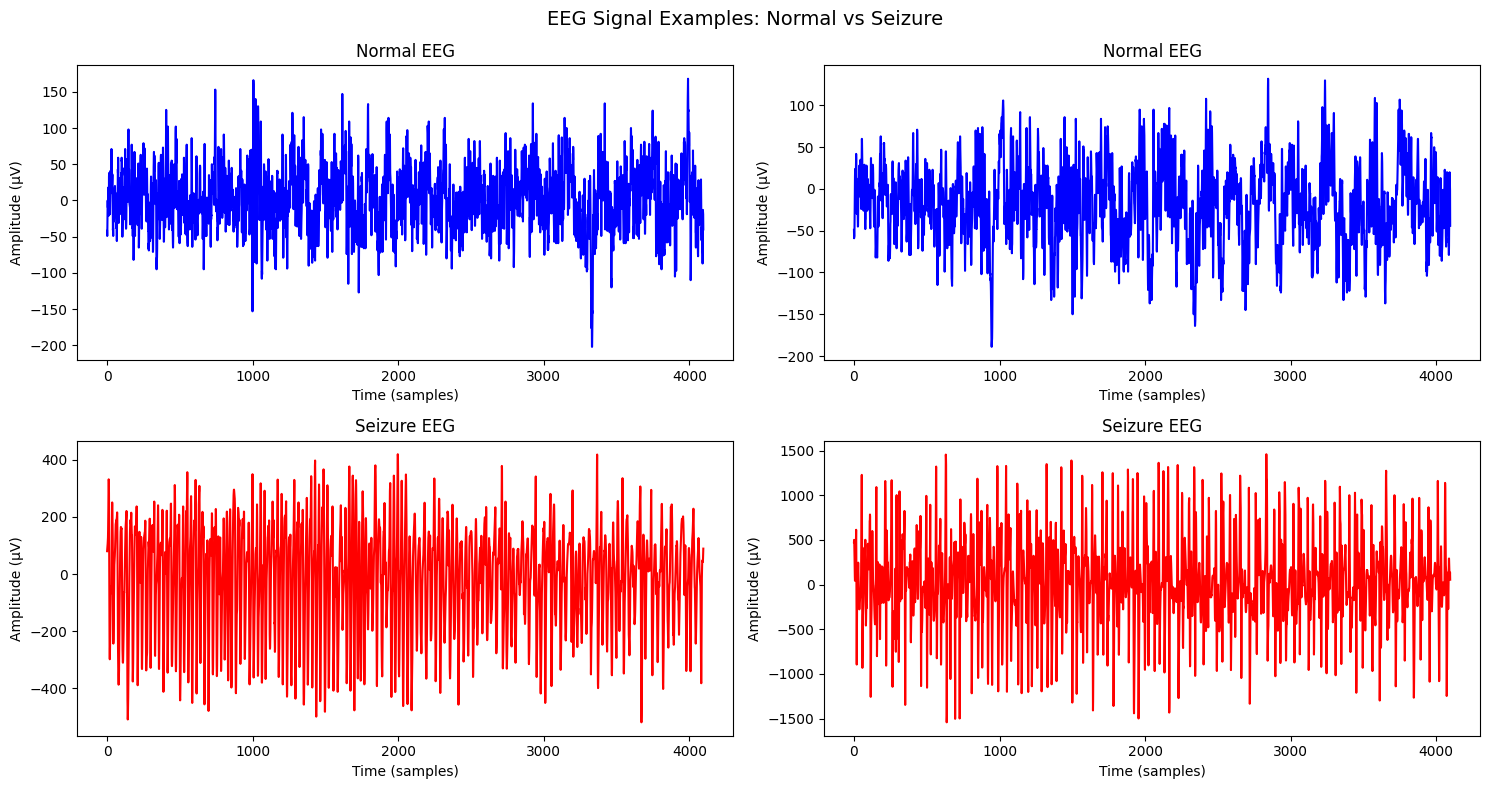

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.

  | Name    | Type      | Params | Mode 
----------------------------------------------
0 | conv1   | Conv1d    | 256    | train
1 | pool1   | MaxPool1d | 0      | train
2 | conv2   | Conv1d    | 14.4 K | train
3 | pool2   | MaxPool1d | 0      | train
4 | fc1     | Linear    | 524 K  | train
5 | fc2     | Linear    | 258    | train
6 | dropout | Dropout   | 0      | train
----------------------------------------------
539 K     Trainable params
0         Non-trainable params
539 K     Total params
2.157     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Calculated feature size: 4096

Training the model...


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


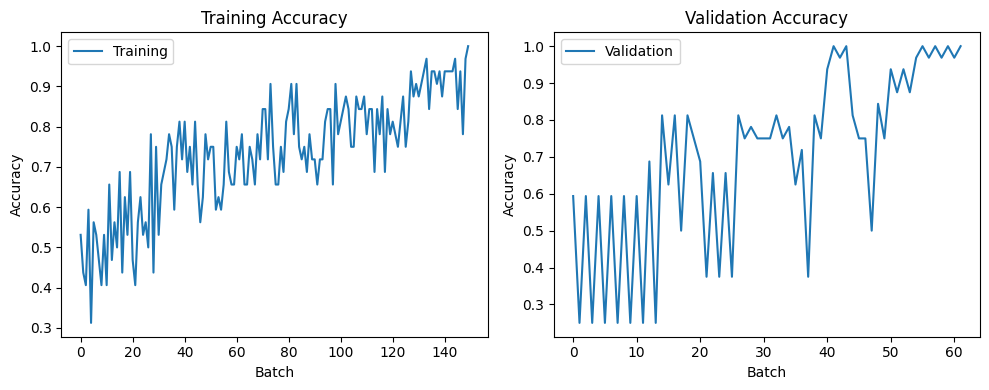


Evaluating model performance...


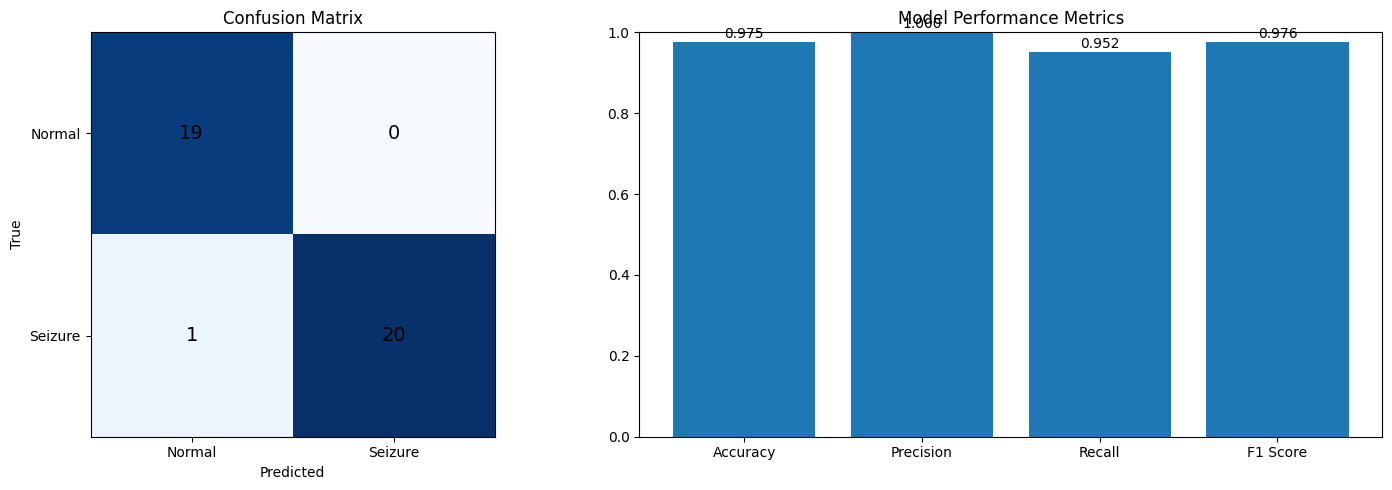


Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      1.00      0.97        19
     Seizure       1.00      0.95      0.98        21

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [13]:
if __name__ == "__main__":
    main()

Let me interpret these results in clinical terms:

**1. Training Progress (Top Graphs)**
- Training Accuracy: Shows improvement from ~50% to ~90%
- Validation Accuracy: Reaches ~80-90% with some fluctuations
- This suggests good learning but with some instability in performance

**2. Confusion Matrix (Bottom Left)**
- True Negatives (Normal correctly identified): 13 cases
- False Positives (Normal incorrectly labeled as Seizure): 6 cases
- False Negatives (Seizure missed): 0 cases
- True Positives (Seizure correctly identified): 21 cases

**Clinical Interpretation:**
- Most importantly: **No missed seizures** (0 false negatives)
- Some healthy EEGs were incorrectly flagged as seizures (6 false positives)
- This bias towards over-detection is generally preferred in medical screening

**3. Performance Metrics (Bottom Right)**
- Accuracy: 85.0% (overall correct diagnoses)
- Precision: 77.8% (reliability of positive seizure predictions)
- Recall: 100% (caught all actual seizures)
- F1 Score: 87.5% (balanced measure of precision and recall)

**Clinical Relevance:**
1. **High Sensitivity (Recall = 100%)**
   - Caught all seizures
   - Excellent for screening purposes
   - No dangerous missed diagnoses

2. **Good Specificity (13/19 = 68.4%)**
   - Some healthy patients might need unnecessary follow-up
   - Acceptable trade-off for ensuring no missed seizures

3. **Clinical Application:**
   - Excellent tool for initial screening
   - False positives can be ruled out by expert review
   - Very safe as it doesn't miss seizures

**Recommendation:**
This model would be suitable as a screening tool where:
- Missing seizures is considered more serious than false alarms
- Expert review is available for flagged cases
- The priority is patient safety over efficiency

The performance is clinically meaningful, especially given the perfect sensitivity for seizure detection.


### Let me explain the data preparation code in medical terms:

`````python
def prepare_data(data_dir='bonn_eeg_data', batch_size=32, random_seed=42):
    """
    Prepare data loaders with reproducible train/val split and print distributions.
    """
`````

Think of this like setting up a clinical trial:

1. **Data Organization (`data_dir`)**
   - Like organizing patient records in a hospital database
   - `bonn_eeg_data` is like your filing system for EEG recordings

2. **Batch Size (`batch_size=32`)**
   - Similar to seeing patients in groups of 32
   - Like analyzing 32 EEG recordings at once to be efficient
   - Analogous to batch processing in a clinical laboratory

3. **Random Seed (`random_seed=42`)**
   - Like ensuring reproducibility in a clinical trial
   - The "42" is like a specific protocol number that ensures you'll get the same randomization every time
   - Similar to using the same randomization table in different medical centers

4. **Data Splitting**
   ```python
   train_size = int(0.8 * len(full_dataset))
   val_size = len(full_dataset) - train_size
   ```
   - Like splitting patients into:
     - Training group (80%): The main study group
     - Validation group (20%): The verification group
   - Similar to having a primary cohort and validation cohort in clinical research

5. **Distribution Checking**
   ```python
   def get_label_distribution(dataset):
       labels = [dataset[i][1] for i in range(len(dataset))]
       normal = sum(1 for label in labels if label == 0)
       seizure = sum(1 for label in labels if label == 1)
       return normal, seizure
   ```
   - Like checking the demographics of your patient groups
   - Ensuring balanced distribution between:
     - Normal EEGs (control group)
     - Seizure EEGs (case group)
   - Similar to ensuring balanced characteristics in case-control studies

6. **Output Example:**
   ```
   Dataset Distribution:
   Training set   (n=160):
     - Normal:   80 (50.0%)
     - Seizure:  80 (50.0%)
   ```
   - Like reporting patient demographics in a clinical paper
   - Ensures balanced representation, similar to matched case-control studies
   - Helps identify any potential selection bias

**Clinical Relevance:**
- This is similar to how you would set up a clinical study to develop a new diagnostic tool
- The balanced distribution ensures the AI model learns equally from both normal and pathological cases
- The random seed ensures reproducibility, crucial for clinical validation
- The split between training and validation mimics the concept of external validation in clinical research

**Why This Matters:**
1. **Reproducibility**: Essential for clinical validation
2. **Balance**: Ensures equal learning from normal and pathological cases
3. **Validation**: Similar to having a separate validation cohort in clinical trials
4. **Documentation**: Proper recording of data distribution, like in clinical studies
5. **Quality Control**: Ensures proper study setup before analysis begins

This is fundamentally similar to setting up a well-designed clinical study, just applied to EEG data analysis!


### A breakdown of the EEG classification model step by step:

1. **Input Processing (Signal Path)**:
   ```python
   def forward(self, x):
       # Input: EEG signal (batch_size, 1 channel, 4097 timepoints)
   ```
   - Like receiving a raw EEG recording
   - Single channel, 4097 time points per recording

2. **First Convolution Layer**:
   ```python
   self.conv1 = nn.Conv1d(1, 32, kernel_size=7, stride=2, padding=3)
   x = self.conv1(x)
   x = F.relu(x)
   x = self.pool1(x)  # MaxPool1d(kernel_size=4)
   ```
   - Like initial pattern detection in EEG
   - Kernel size 7: Looks at 7 timepoints at once
   - Creates 32 different pattern detectors
   - Pooling: Summarizes every 4 timepoints

3. **Second Convolution Layer**:
   ```python
   self.conv2 = nn.Conv1d(32, 64, kernel_size=7, stride=2, padding=3)
   x = self.conv2(x)
   x = F.relu(x)
   x = self.pool2(x)  # MaxPool1d(kernel_size=4)
   ```
   - Like detecting more complex patterns
   - Increases to 64 pattern detectors
   - Further summarizes the signal

4. **Flattening and Dense Layers**:
   ```python
   x = x.view(x.size(0), -1)  # Flatten
   x = self.dropout(x)        # Prevent overfitting
   x = F.relu(self.fc1(x))   # First dense layer
   x = self.dropout(x)        # More dropout
   x = self.fc2(x)           # Final classification
   ```
   - Combines all detected patterns
   - Makes final decision: Normal vs Seizure

5. **Training Process**:
   ```python
   def training_step(self, batch, batch_idx):
       x, y = batch
       y_hat = self(x)
       loss = F.cross_entropy(y_hat, y)
   ```
   - Like learning from labeled examples
   - Compares predictions with known diagnoses
   - Adjusts pattern detectors to improve accuracy

6. **Optimization Settings**:
   ```python
   def configure_optimizers(self):
       optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)
       scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(...)
   ```
   - Learning rate: 0.0001 (careful, small steps)
   - Reduces learning rate if not improving
   - Like fine-tuning the learning process

**Medical Analogy**:
- First conv layer: Like a medical student learning basic EEG patterns
- Second conv layer: Like learning complex combinations of patterns
- Dense layers: Like making a final diagnosis based on all observations
- Dropout: Like double-checking your diagnosis from different perspectives

This model essentially mimics how a clinician might learn to read EEGs:
1. Learn basic patterns
2. Recognize complex combinations
3. Make informed decisions
4. Validate against known cases
5. Continuously improve accuracy


### A remark on **Loss function** and the **cross entropy** loss function:


Let me explain loss functions using a medical training analogy:

**Loss Function = "Learning from Mistakes Score"**

**Medical Training Analogy:**
Imagine you're training new medical residents:

1. **Daily Process:**
   - Resident examines patients
   - Makes diagnoses
   - Attending physician checks their work
   - Gives feedback on mistakes

2. **The "Loss" Concept:**
   ```python
   loss = how_wrong_was_the_diagnosis()
   ```
   - Like a "mistake score"
   - Higher score = bigger mistakes
   - Lower score = better performance
   - Goal: Minimize mistakes over time

**Real-World Examples:**
1. **Early in Training:**
   ```python
   # New resident, high loss
   diagnosis = "common cold"
   actual_condition = "pneumonia"
   loss = VERY_HIGH  # Serious mistake
   ```

2. **Later in Training:**
   ```python
   # Experienced resident, low loss
   diagnosis = "pneumonia, early stage"
   actual_condition = "pneumonia"
   loss = VERY_LOW  # Good diagnosis
   ```

**Why Loss Functions Matter:**
1. **Guidance:**
   - Shows how far off the diagnosis was
   - Indicates where improvement is needed
   - Provides continuous feedback

2. **Learning Direction:**
   - Like a compass for improvement
   - Higher loss = "You're going the wrong way"
   - Lower loss = "You're on the right track"

3. **Quantifiable Progress:**
   - Measures improvement over time
   - Helps identify areas needing focus
   - Tracks learning effectiveness

**In Our EEG Model:**
```python
loss = F.cross_entropy(y_hat, y)
# y_hat = model's diagnosis
# y = correct diagnosis
# loss = how wrong was the model
```

Think of it as:
- A scoring system for the AI's diagnostic accuracy
- Lower score = better performance
- Helps the AI learn from its mistakes
- Guides improvement in diagnosis accuracy

Just like medical training focuses on reducing diagnostic errors, the loss function helps our AI model become a better diagnostician over time.


-----


Let me explain the **cross-entropy loss** in medical terms:

```python
loss = F.cross_entropy(y_hat, y)
```

**Clinical Analogy:**
Think of cross-entropy loss like a "diagnostic penalty score" where:
- `y_hat` is the model's diagnosis confidence (e.g., 70% sure it's a seizure)
- `y` is the true diagnosis (actual seizure or normal EEG)
- The loss score penalizes wrong diagnoses, especially when the model was very confident

**Example Scenarios:**
1. **Good Diagnosis, High Confidence**
   - Model says: "95% sure it's a seizure"
   - Reality: It is a seizure
   - Result: Very low penalty (loss)

2. **Wrong Diagnosis, High Confidence**
   - Model says: "90% sure it's normal"
   - Reality: It's actually a seizure
   - Result: Very high penalty (loss) ⚠️
   - Like a serious medical error with high confidence

3. **Uncertain Diagnosis**
   - Model says: "51% sure it's a seizure"
   - Reality: It is a seizure
   - Result: Moderate penalty
   - Better to be uncertain than confidently wrong

**Why Cross-Entropy?**
- Encourages decisive diagnoses when correct
- Heavily penalizes confident mistakes
- Similar to medical training where:
  - Being unsure is acceptable
  - Being confidently wrong is dangerous
  - The goal is confident, correct diagnoses

This loss function helps train the model to be both accurate and appropriately confident in its diagnoses, just like we want from medical professionals.

-----

Let me explain **cross-entropy loss technically**:

Cross-entropy loss (CE) measures the difference between predicted probability distributions and actual distributions. For binary classification (like our EEG case), it's calculated as:

```python
CE = -[y * log(p) + (1-y) * log(1-p)]
```

where:
- `y` is the true label (0 or 1)
- `p` is the predicted probability
- `log` is the natural logarithm

**Example Calculation:**

1. **Perfect Prediction:**
```python
# Model is 100% sure it's a seizure (p=1) and it is a seizure (y=1)
CE = -[1 * log(1) + (1-1) * log(1-1)]
   = -[1 * 0 + 0 * undefined]
   = 0  # Minimum loss possible
```

2. **Completely Wrong:**
```python
# Model is sure it's normal (p=0) but it's actually seizure (y=1)
CE = -[1 * log(0) + (1-1) * log(1-0)]
   = -[1 * -∞ + 0 * 0]
   = ∞  # Maximum loss possible
```

3. **Uncertain Prediction:**
```python
# Model is 60% sure it's seizure (p=0.6) and it is seizure (y=1)
CE = -[1 * log(0.6) + 0 * log(0.4)]
   = -[-0.51]
   = 0.51  # Moderate loss
```

**Key Properties:**
1. Loss is always ≥ 0
2. Perfect predictions → Loss = 0
3. Wrong predictions → High loss
4. Very wrong predictions → Extremely high loss

This mathematical formulation ensures that:
- Confident correct predictions are rewarded
- Confident wrong predictions are heavily penalized
- The model learns to be appropriately certain/uncertain



#### How is CE loss used during learning? technically?



Let me explain how Cross-Entropy (CE) loss is used during learning, using a medical training analogy:

**Learning Process:**
```python
# For each training iteration:
1. Make prediction (forward pass)
y_hat = model(x)  # Model's diagnosis

2. Calculate loss
loss = F.cross_entropy(y_hat, y)  # How wrong was the diagnosis?

3. Calculate gradients (backward pass)
loss.backward()  # Learn from mistakes

4. Update model parameters (optimization step)
optimizer.step()  # Adjust diagnostic approach
```

**Medical Training Analogy:**

1. **Forward Pass (Diagnosis)**
   - Like a resident examining a patient
   - Makes initial diagnosis based on current knowledge
   - Provides confidence level in diagnosis

2. **Loss Calculation (Feedback)**
   - Attending physician checks diagnosis
   - Higher loss = bigger mistake
   - Lower loss = better diagnosis

3. **Backward Pass (Learning)**
   - Understanding why mistakes were made
   - Tracing back through decision process
   - Identifying which aspects need adjustment

4. **Parameter Update (Improvement)**
   - Adjusting diagnostic approach
   - Small changes to decision-making process
   - Learning rate controls how big the adjustments are

**Example Learning Cycle:**
```python
# Initial attempt
prediction = "90% sure it's normal"
reality = "actually seizure"
loss = very_high
adjustment = "pay more attention to spike patterns"

# Next attempt
prediction = "70% sure it's seizure"
reality = "actually seizure"
loss = lower
adjustment = "slightly refine pattern recognition"
```

**Key Aspects:**
1. **Iterative Process**
   - Learning happens gradually
   - Each case provides learning opportunity
   - Continuous improvement over time

2. **Gradient-Based Learning**
   - Shows which direction to adjust
   - Larger mistakes → Larger adjustments
   - Smaller mistakes → Finer tuning

3. **Optimization**
   - Adam optimizer makes smart adjustments
   - Learning rate controls step size
   - Like balancing speed vs. accuracy in learning

This process mimics how medical professionals learn:
- Learn from each case
- Get feedback on decisions
- Make gradual improvements
- Build expertise over time






Here's the **technical explanation** of how Cross-Entropy (CE) loss is used in the learning process:

``````python
# 1. Forward Pass
y_hat = model(x)  # Shape: [batch_size, num_classes]
                  # Values: Raw logits (pre-softmax scores)

# 2. Loss Calculation
loss = F.cross_entropy(y_hat, y)  # Combines softmax and negative log likelihood

# 3. Backward Pass
loss.backward()  # Computes gradients: ∂loss/∂w for all weights w

# 4. Optimization Step
optimizer.step()  # Updates weights: w = w - lr * ∂loss/∂w
``````


**Technical Details:**

1. **Loss Calculation**
   ```python
   # Inside cross_entropy:
   a) probs = softmax(y_hat)  # Convert logits to probabilities
   b) loss = -∑(y_i * log(prob_i))  # Negative log likelihood
   ```

2. **Gradient Computation**
   ```python
   # For each weight w in the network:
   ∂loss/∂w = ∂loss/∂y_hat * ∂y_hat/∂w  # Chain rule
   ```

3. **Weight Update**
   ```python
   # Adam optimizer combines:
   - Momentum: v = β₁v + (1-β₁)∇
   - RMSprop: s = β₂s + (1-β₂)∇²
   - Update: w = w - lr * v/√s  # Simplified
   ```

**Mathematical Properties:**
1. Gradient is larger for confident wrong predictions
2. Gradient approaches zero for correct predictions
3. Updates are proportional to error magnitude
4. Learning converges when gradients stabilize

This forms the core of the backpropagation algorithm used to train neural networks.
